In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
#import the module

In [ ]:
(train_data, train_label) , (test_data,test_label) = mnist.load_data() #give the name

11490434/11490434 [==============================] - 0s 0us/step


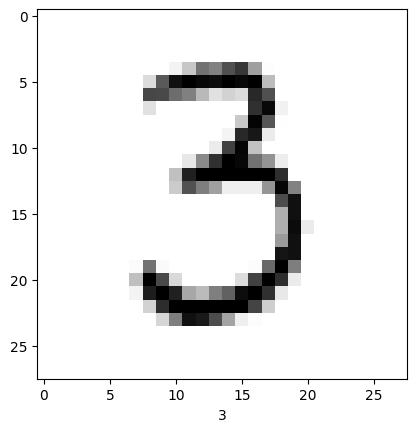

In [ ]:
img_temp = train_data[50].reshape((28, 28)) #get the spacific train img index
plt.imshow(img_temp, cmap=plt.cm.binary, interpolation='nearest') #show the images code
plt.xlabel(train_label[50]) #give the x label according to that name
plt.grid(False) #stop the grid
plt.show() #show the images

In [ ]:
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32')
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32')

In [ ]:
train_data, test_data = train_data / 255.0, test_data / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [ ]:
comp = model.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 6ms/step - loss: 0.1439 - accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

In [ ]:
test_loss , test_acc = model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9908


In [ ]:
predictions = model.predict(test_data)
index_to_display = 786
predicted_label = tf.argmax(tf.nn.softmax(predictions[index_to_display])).numpy()

313/313 [==============================] - 1s 2ms/step


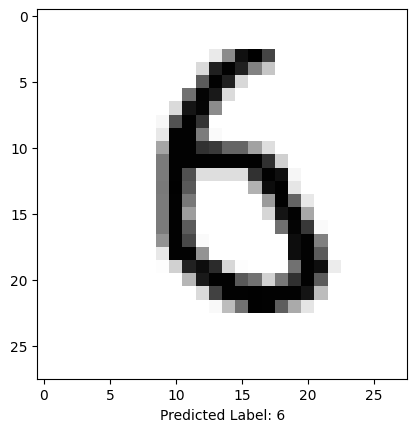


The Prediction Number is the :6


In [ ]:
plt.imshow(test_data[index_to_display].reshape((28, 28)), cmap=plt.cm.binary)
plt.xlabel(f"Predicted Label: {predicted_label}")
plt.grid(False)
plt.show()
print(f'\nThe Prediction Number is the :{predicted_label}')